In [1]:
pip install cirq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.7/532.7 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.8/202.8 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

In [29]:
import cirq
import numpy as np

# Ax = b
A = np.array([[1,0],[0,1]])
b = np.array([1,0])

# Create qubits
qubits = [cirq.NamedQubit(f'q{i}') for i in range(3)]

# Define the circuit
circuit = cirq.Circuit()

# Apply Hadamard gates to create superposition between qubits
circuit.append(cirq.H.on_each(qubits))

# Difine oracle for A
def oracle(matrix):
  return cirq.MatrixGate(matrix)

#apply the oracles as conntrolled opr
circuit.append(cirq.ControlledGate(oracle(A)).on(qubits[0],qubits[1]))

#apply controlled rotations based on b
theta =np.arccos(b[0]/np.linalg.norm(b))
circuit.append(cirq.ry(2*theta).controlled().on(qubits[0], qubits[2]))

circuit.append(cirq.measure(*qubits,key="QLR-Results"))
sim = cirq.Simulator()
r = sim.run(circuit, repetitions=10**3)
print(circuit)
print(r.histogram(key="QLR-Results"))

q0: ───H───@───────@───────M('QLR-Results')───
           │       │       │
           ┌   ┐   │       │
q1: ───H───│1 0│───┼───────M──────────────────
           │0 1│   │       │
           └   ┘   │       │
                   │       │
q2: ───H───────────Ry(0)───M──────────────────
Counter({7: 143, 4: 142, 2: 131, 5: 129, 3: 118, 6: 118, 1: 114, 0: 105})


<BarContainer object of 8 artists>

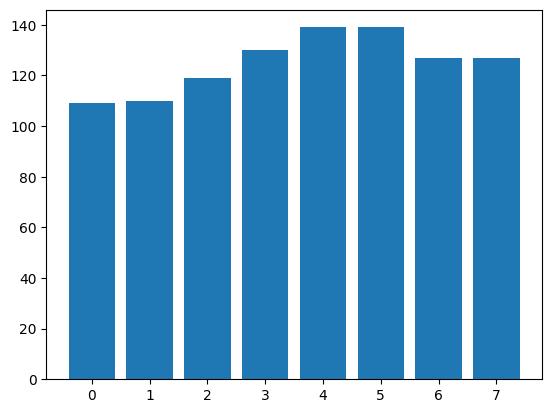

In [27]:
import matplotlib.pyplot as plt
x = r.histogram(key="QLR-Results").keys()
y = r.histogram(key="QLR-Results").values()
plt.bar(x,y)